<a href="https://colab.research.google.com/github/tewei0328/AI/blob/master/%E5%96%AE%E5%85%836/6-3_ML_decision_tree_VIZ_pandas_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.爬蟲台股走勢

In [0]:
import io
import requests
import datetime
import pandas as pd

def crawl_price(stock_id):
    now = int(datetime.datetime.now().timestamp())+86400
    url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=0&period2=" + str(now) + "&interval=1d&events=history&crumb=hP2rOschxO0"

    response = requests.post(url)

    f = io.StringIO(response.text)
    df = pd.read_csv(f, index_col='Date', parse_dates=['Date'] )

    return df

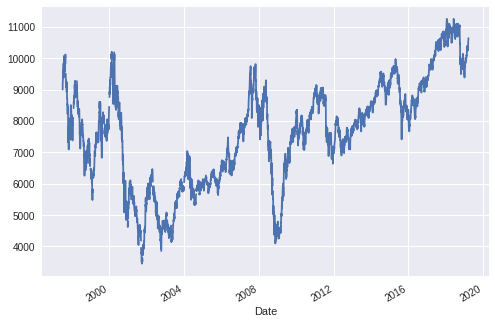

In [0]:
df = crawl_price("^TWII")
df.Close.plot()

# 2.取出特徵值
features

In [0]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-07-02,9094.269531,9124.299805,8988.129883,8996.719727,8996.686523,0.0
1997-07-03,9061.599609,9061.599609,8997.509766,9027.629883,9027.596680,0.0
1997-07-04,9144.959961,9218.209961,9119.250000,9192.570313,9192.536133,0.0
1997-07-07,9365.190430,9370.410156,9304.820313,9322.839844,9322.805664,0.0
1997-07-08,9345.549805,9371.500000,9282.099609,9305.269531,9305.235352,0.0


In [0]:
features=df[['Open', 'High', 'Low', 'Close', 'Volume']]['2018']

In [0]:
features1=df[['Open', 'High', 'Low', 'Close', 'Volume']]['2018']

# 3.製造labels
漲為1,
跌為0

In [0]:
features['Label1']=features['Close']-features['Close'].shift(1)

In [0]:
features.head()

,Open,High,Low,Close,Volume,Label1
Date,,,,,,
2018-01-02,10664.820313,10710.730469,10650.769531,10710.730469,2304600.0,NaN
2018-01-03,10759.610352,10813.160156,10759.610352,10801.570313,2875900.0,90.839844
2018-01-04,10834.580078,10853.459961,10794.250000,10848.629883,2957000.0,47.059570
2018-01-05,10856.919922,10879.799805,10815.679688,10879.799805,2937500.0,31.169922
2018-01-08,10899.089844,10918.469727,10869.120117,10915.750000,3149500.0,35.950195


In [0]:
features=features.dropna()

In [0]:
features['Label2']=0
for i in range(1,len(features)):
  if features['Label1'][i]<0:
    features['Label2'][i]=0
  else:
    features['Label2'][i]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
features['Label2'][0]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
features.head()

,Open,High,Low,Close,Volume,Label1,Label2
Date,,,,,,,
2018-01-03,10759.610352,10813.160156,10759.610352,10801.570313,2875900.0,90.839844,1
2018-01-04,10834.580078,10853.459961,10794.250000,10848.629883,2957000.0,47.059570,1
2018-01-05,10856.919922,10879.799805,10815.679688,10879.799805,2937500.0,31.169922,1
2018-01-08,10899.089844,10918.469727,10869.120117,10915.750000,3149500.0,35.950195,1
2018-01-09,10922.349609,10931.000000,10860.769531,10914.889648,2845100.0,-0.860352,0


In [0]:
labels=features['Label2']

In [0]:
labels.head()

Date
2018-01-03    1
2018-01-04    1
2018-01-05    1
2018-01-08    1
2018-01-09    0
Name: Label2, dtype: int64

In [0]:
del features['Label1']
del features['Label2']

In [0]:
#import numpy as np

In [0]:
#features=np.array(features)

In [0]:
features

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-03,10759.610352,10813.160156,10759.610352,10801.570313,2.875900e+06
2018-01-04,10834.580078,10853.459961,10794.250000,10848.629883,2.957000e+06
2018-01-05,10856.919922,10879.799805,10815.679688,10879.799805,2.937500e+06
2018-01-08,10899.089844,10918.469727,10869.120117,10915.750000,3.149500e+06
2018-01-09,10922.349609,10931.000000,10860.769531,10914.889648,2.845100e+06
2018-01-10,10915.320313,10934.750000,10819.250000,10831.089844,3.127300e+06
2018-01-11,10824.540039,10844.080078,10770.099609,10810.059570,2.654100e+06
2018-01-12,10818.240234,10899.980469,10818.240234,10883.959961,2.813300e+06
2018-01-15,10932.370117,10962.549805,10911.889648,10956.309570,2.592300e+06


In [0]:
features.values[0]

array([  10759.610352,   10813.160156,   10759.610352,   10801.570313,
       2875900.      ])

In [0]:
#labels=np.array(labels)

In [0]:
labels

# 4.選用decision tree為學習模型

In [0]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier()

In [0]:
clf = clf.fit(features,labels)

In [0]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 5.測試學習成效

In [0]:
wantPredict = clf.predict([features.values[5]]) 
if wantPredict == [1]:
    print('up')
elif wantPredict == [0]:
    print('down')

down


In [0]:
features.values[5]

array([  10915.320313,   10934.75    ,   10819.25    ,   10831.089844,
       3127300.      ])

In [0]:
features1.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,10664.820313,10710.730469,10650.769531,10710.730469,2304600.0
2018-01-03,10759.610352,10813.160156,10759.610352,10801.570313,2875900.0
2018-01-04,10834.580078,10853.459961,10794.250000,10848.629883,2957000.0
2018-01-05,10856.919922,10879.799805,10815.679688,10879.799805,2937500.0
2018-01-08,10899.089844,10918.469727,10869.120117,10915.750000,3149500.0
2018-01-09,10922.349609,10931.000000,10860.769531,10914.889648,2845100.0
2018-01-10,10915.320313,10934.750000,10819.250000,10831.089844,3127300.0
2018-01-11,10824.540039,10844.080078,10770.099609,10810.059570,2654100.0
2018-01-12,10818.240234,10899.980469,10818.240234,10883.959961,2813300.0


In [0]:
features.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-03,10759.610352,10813.160156,10759.610352,10801.570313,2875900.0
2018-01-04,10834.580078,10853.459961,10794.250000,10848.629883,2957000.0
2018-01-05,10856.919922,10879.799805,10815.679688,10879.799805,2937500.0
2018-01-08,10899.089844,10918.469727,10869.120117,10915.750000,3149500.0
2018-01-09,10922.349609,10931.000000,10860.769531,10914.889648,2845100.0
